In [30]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [5]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [11]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 

session.query(Measurement.date, Measurement.tobs).filter(func.strftime("%m", Measurement.date) == "06").all()

[('2010-06-01', 78.0),
 ('2010-06-02', 76.0),
 ('2010-06-03', 78.0),
 ('2010-06-04', 76.0),
 ('2010-06-05', 77.0),
 ('2010-06-06', 78.0),
 ('2010-06-07', 77.0),
 ('2010-06-08', 78.0),
 ('2010-06-09', 78.0),
 ('2010-06-10', 79.0),
 ('2010-06-11', 78.0),
 ('2010-06-12', 78.0),
 ('2010-06-13', 78.0),
 ('2010-06-14', 77.0),
 ('2010-06-15', 78.0),
 ('2010-06-16', 78.0),
 ('2010-06-17', 77.0),
 ('2010-06-18', 77.0),
 ('2010-06-19', 82.0),
 ('2010-06-20', 78.0),
 ('2010-06-21', 78.0),
 ('2010-06-22', 78.0),
 ('2010-06-23', 78.0),
 ('2010-06-24', 78.0),
 ('2010-06-25', 77.0),
 ('2010-06-26', 76.0),
 ('2010-06-27', 78.0),
 ('2010-06-28', 78.0),
 ('2010-06-29', 78.0),
 ('2010-06-30', 78.0),
 ('2011-06-01', 77.0),
 ('2011-06-02', 78.0),
 ('2011-06-03', 73.0),
 ('2011-06-04', 70.0),
 ('2011-06-05', 76.0),
 ('2011-06-06', 77.0),
 ('2011-06-07', 77.0),
 ('2011-06-08', 77.0),
 ('2011-06-09', 77.0),
 ('2011-06-10', 78.0),
 ('2011-06-11', 77.0),
 ('2011-06-12', 77.0),
 ('2011-06-13', 78.0),
 ('2011-06-

In [10]:
#  3. Convert the June temperatures to a list.

june_temps = []
june_temps = session.query(Measurement.date, Measurement.tobs).filter(func.strftime("%m", Measurement.date == "06")).all()

In [18]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 

df = pd.DataFrame(june_temps, columns = ["Date","June Temps"])

In [19]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.

df.describe()

,June Temps
count,19550.000000
mean,73.097954
std,4.523527
min,53.000000
25%,70.000000
50%,73.000000
75%,76.000000
max,87.000000


In [25]:
#Number of stations available in this dataset.

session.query()
session.query(func.count(Station.station)).all()

[(9,)]

In [26]:
# Most active station
session.query()
session.query(Measurement.station, func.count(Measurement.station))

# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [27]:
# Using the station id from the previous query, calculate the lowest precipitation recorded, 
# highest precipitation recorded, and average precipitation most active station?
session.query()
session.query(func.min(Measurement.prcp), func.max(Measurement.prcp), func.avg(Measurement.prcp)).\
filter(Measurement.station == 'USC00519281').all()

[(0.0, 9.64, 0.2123520923520915)]

## D2: Determine the Summary Statistics for December

In [21]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.

session.query(Measurement.date, Measurement.tobs).filter(func.strftime("%m", Measurement.date) == "12").all()

[('2010-12-01', 76.0),
 ('2010-12-03', 74.0),
 ('2010-12-04', 74.0),
 ('2010-12-06', 64.0),
 ('2010-12-07', 64.0),
 ('2010-12-08', 67.0),
 ('2010-12-09', 77.0),
 ('2010-12-10', 66.0),
 ('2010-12-11', 69.0),
 ('2010-12-12', 68.0),
 ('2010-12-13', 68.0),
 ('2010-12-14', 71.0),
 ('2010-12-15', 74.0),
 ('2010-12-16', 67.0),
 ('2010-12-17', 66.0),
 ('2010-12-18', 69.0),
 ('2010-12-19', 71.0),
 ('2010-12-23', 70.0),
 ('2010-12-24', 70.0),
 ('2010-12-26', 74.0),
 ('2010-12-27', 74.0),
 ('2010-12-28', 71.0),
 ('2010-12-29', 75.0),
 ('2010-12-30', 75.0),
 ('2010-12-31', 72.0),
 ('2011-12-01', 69.0),
 ('2011-12-02', 68.0),
 ('2011-12-03', 73.0),
 ('2011-12-04', 74.0),
 ('2011-12-05', 73.0),
 ('2011-12-06', 73.0),
 ('2011-12-07', 73.0),
 ('2011-12-08', 73.0),
 ('2011-12-09', 71.0),
 ('2011-12-10', 73.0),
 ('2011-12-11', 73.0),
 ('2011-12-12', 77.0),
 ('2011-12-13', 72.0),
 ('2011-12-14', 71.0),
 ('2011-12-15', 73.0),
 ('2011-12-16', 70.0),
 ('2011-12-17', 73.0),
 ('2011-12-18', 69.0),
 ('2011-12-

In [22]:
# 7. Convert the December temperatures to a list.

dec_temps = []
dec_temps = session.query(Measurement.date, Measurement.tobs).filter(func.strftime("%m", Measurement.date) == "12").all()

In [23]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 

df=pd.DataFrame(dec_temps, columns = ["date", "December Temps"])

In [24]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.

df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


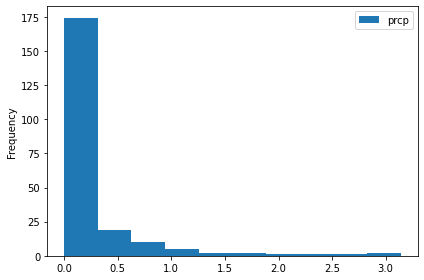

In [32]:
# Choose the station with the highest number of precipitation observations for the month of December.
results = session.query(Measurement.prcp).\
filter(Measurement.station == 'USC00519281').\
filter(func.strftime("%m", Measurement.date) == "12").all()

# Query temperature observation data for this station and plot the results as a histogram
df = pd.DataFrame(results, columns=['prcp'])
df.plot.hist()
plt.tight_layout()
